In [1]:
%pylab inline
plt.style.use("default")
import os, sys
import scipy
import random
from glob import glob
from scipy.io import loadmat
from scipy.sparse.linalg import eigsh
from mpl_toolkits import mplot3d
from scipy.stats import skewnorm 
from scipy.stats import skew, kurtosis
import matplotlib.gridspec as Gridspec

plt.rcParams['figure.figsize'] = (15, 5) 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data_root = "/Users/duuta/ppp/data/stringer/"
data_files = [fname.split("/")[-1] for fname in glob(f"{data_root}natimg2800_M*.mat")]
data = loadmat(os.path.join(data_root, data_files[1]), simplify_cells = True) 
spont = data['stim']['spont']
resp = data['stim']['resp']

In [4]:
def abib_metric(X):
    n = X.shape[0]
    X2 = X**2
    EX2 = mean(sum(X2, axis=0))
    r = EX2/n
    return r 

# random points on a disk and on circle

In [133]:
R=1
U1 = uniform(size=10000)
U2 = uniform(size=10000)

x = R * sqrt(U2) * cos(2*pi*U1)
y = R * sqrt(U2) * sin(2*pi*U1)

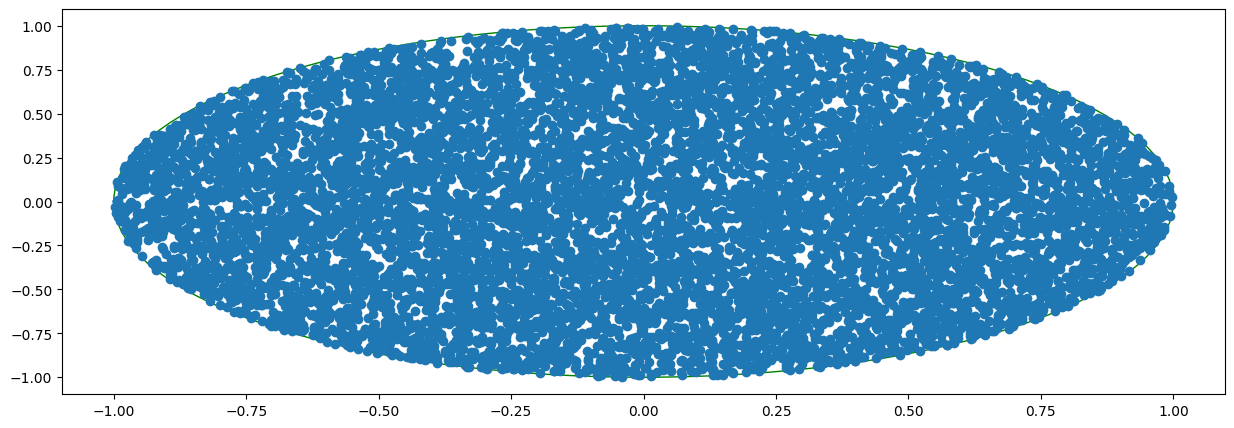

In [135]:
cic=Circle((0,0), 1, color='g', fill=False)
fig, ax = subplots()
plot(x, y, 'o')
ax.add_artist(cic)

plt.show()

In [136]:
disc_ = np.empty((10000, 2))
for i in range(len(x)):
    disc_[i, :] = [x[i], y[i]]

In [137]:
abib_metric(disc_)

0.24971703149942956

In [138]:
centerX=0
centerY=0
r = R * sqrt(random.random())
theta = random.random() * 2 * pi
x1 = centerX + r * cos(theta)
y1 = centerY + r * sin(theta)

In [139]:
disc0 = array([x1, y1])

In [140]:
abib_metric(disc0)

0.48185185616491677

# points on the circle


In [141]:
R0 = 1
t = randn(1000, )
x0 = R0*cos(2*pi*t)
y0 = R0*sin(2*pi*t)
cir0 = array([x0, y0])

In [142]:
abib_metric(cir0)

0.5

# points on sphere 


In [22]:
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec


In [23]:
xi, yi, zi = sample_spherical(10000)
sph0 = np.array([xi, yi, zi])

In [25]:
abib_metric(sph0)

0.3333333333333333

In [26]:
def onSphereCheck(n):
    theta = linspace(0, 2*pi);
    phi = linspace(0, pi);

    for _ in range(n):
        r_ = random.random();
    
        x_ = r_ * sin(phi) * cos(theta);
        y_ = r_ * sin(phi) * sin(theta);
        z_ = r_ * cos(phi);
    
        sph1 = np.array([x_, y_, z_])
    
        d = round(abib_metric(sph1), 2) 
        if d == 0.33:
            return 1 
    
    return 0 

In [146]:
onSphereCheck(100)

1

# verifying subG and subE for bernouli distribution

In [6]:
ber = np.random.binomial(n=1,p=0.9, size=(10000, 100))

In [209]:
subG(ber, t=np.linspace(0.01, 1000, 10000))

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_86203/1799749639.py:4: RuntimeWarning: overflow encountered in exp
  d = exp(sxs/j**2)


1.21010801080108

In [214]:
subE(ber, t=np.linspace(0.01, 1000, 100000))

1.998028693481954


1.34